In [15]:
import src.load_data as load_data
import seaborn as sns
import pandas as pd

# load in the data
joined = load_data.data_pipeline()

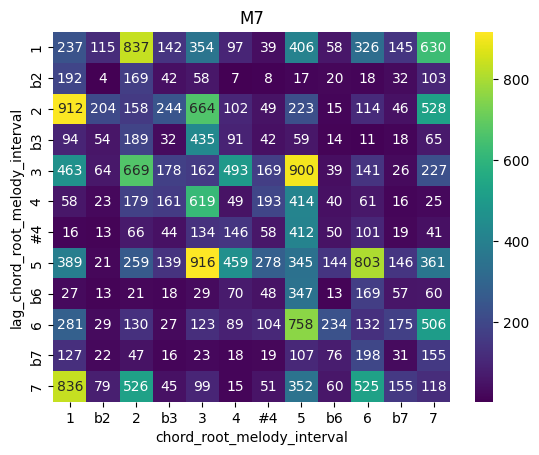

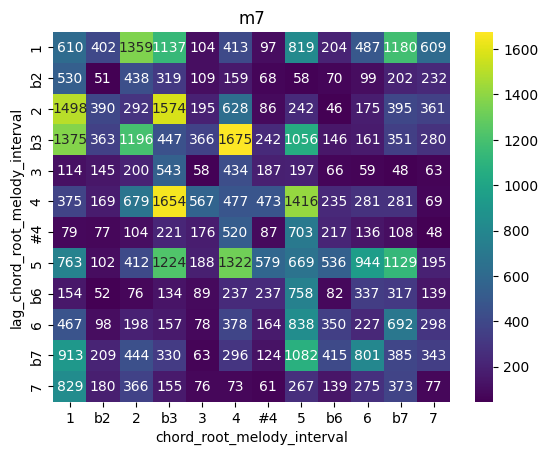

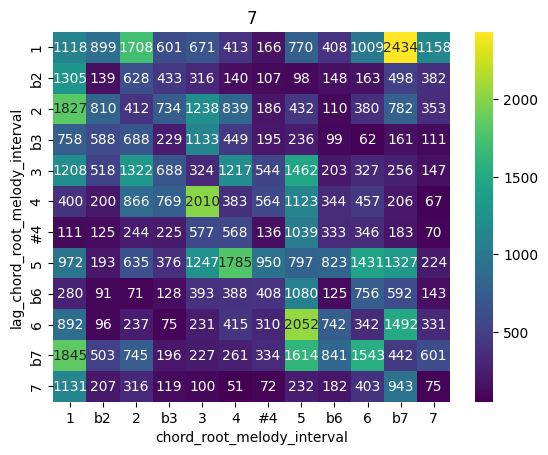

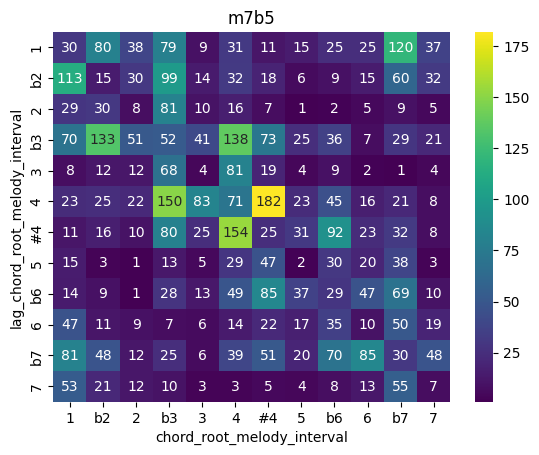

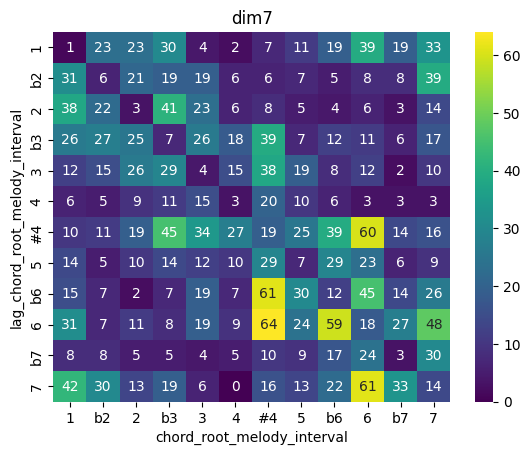

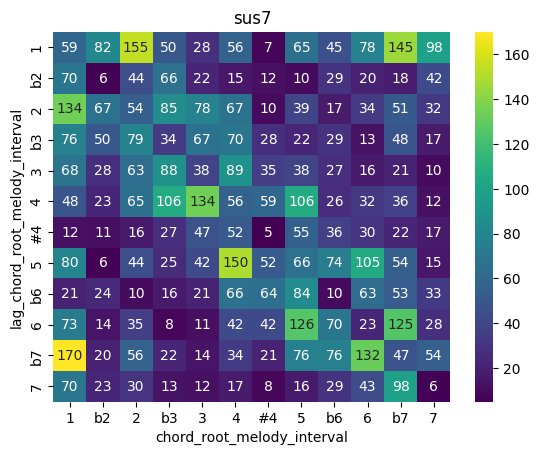

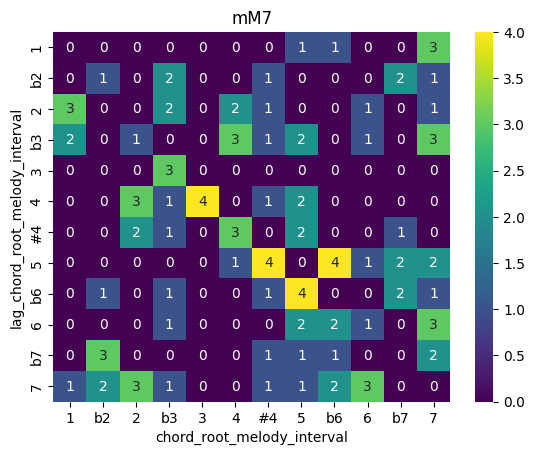

In [16]:
from src.music_theory import get_interval_from_note_nums
import matplotlib.pyplot as plt

note_sequence_df = joined[["melid", "chord_type_base", "chord_root_num", "melody_note_num", "chord_root_melody_interval"]].copy()
note_sequence_df['next_chord_root_num'] = note_sequence_df.groupby('melid')['chord_root_num'].shift(-1)
note_sequence_df = get_interval_from_note_nums(note_sequence_df, 'next_chord_root_num', 'melody_note_num', 'next_chord_root_melody_interval')
note_sequence_df['lag_chord_root_melody_interval'] = note_sequence_df.groupby('melid')['next_chord_root_melody_interval'].shift(1)

note_sequence_df = note_sequence_df[['chord_type_base', 'chord_root_melody_interval', 'lag_chord_root_melody_interval']]
note_sequence_df = note_sequence_df.dropna()

for i, chord_type_base in enumerate(note_sequence_df['chord_type_base'].unique()):
    if chord_type_base in ['NC']:
        continue
    
    df = note_sequence_df.query('chord_type_base==@chord_type_base')

    df = df.groupby(['chord_root_melody_interval', 'lag_chord_root_melody_interval']).size().reset_index(name='count')

    df = df.pivot(index='lag_chord_root_melody_interval', columns='chord_root_melody_interval', values='count')

    plt.figure(i)
    sns.heatmap(df, annot=True, fmt="g", cmap='viridis').set(title=chord_type_base)


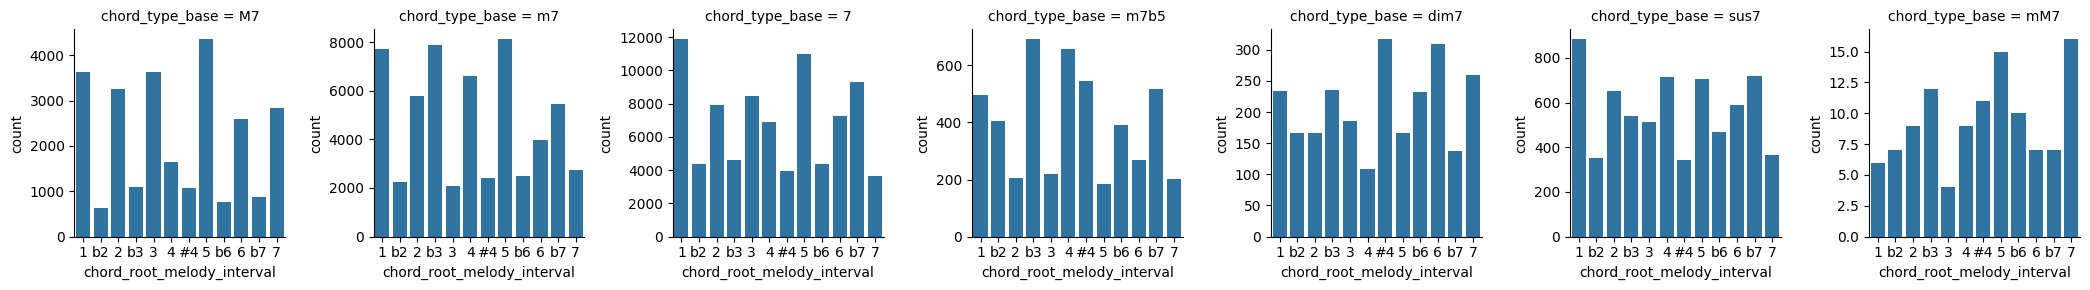

In [17]:
# overall chord tone distribution

filtered_df = joined.query("chord_type_base != 'NC'")

g = sns.FacetGrid(filtered_df, col="chord_type_base", sharey=False, margin_titles=True)
g.map_dataframe(sns.countplot, x="chord_root_melody_interval")

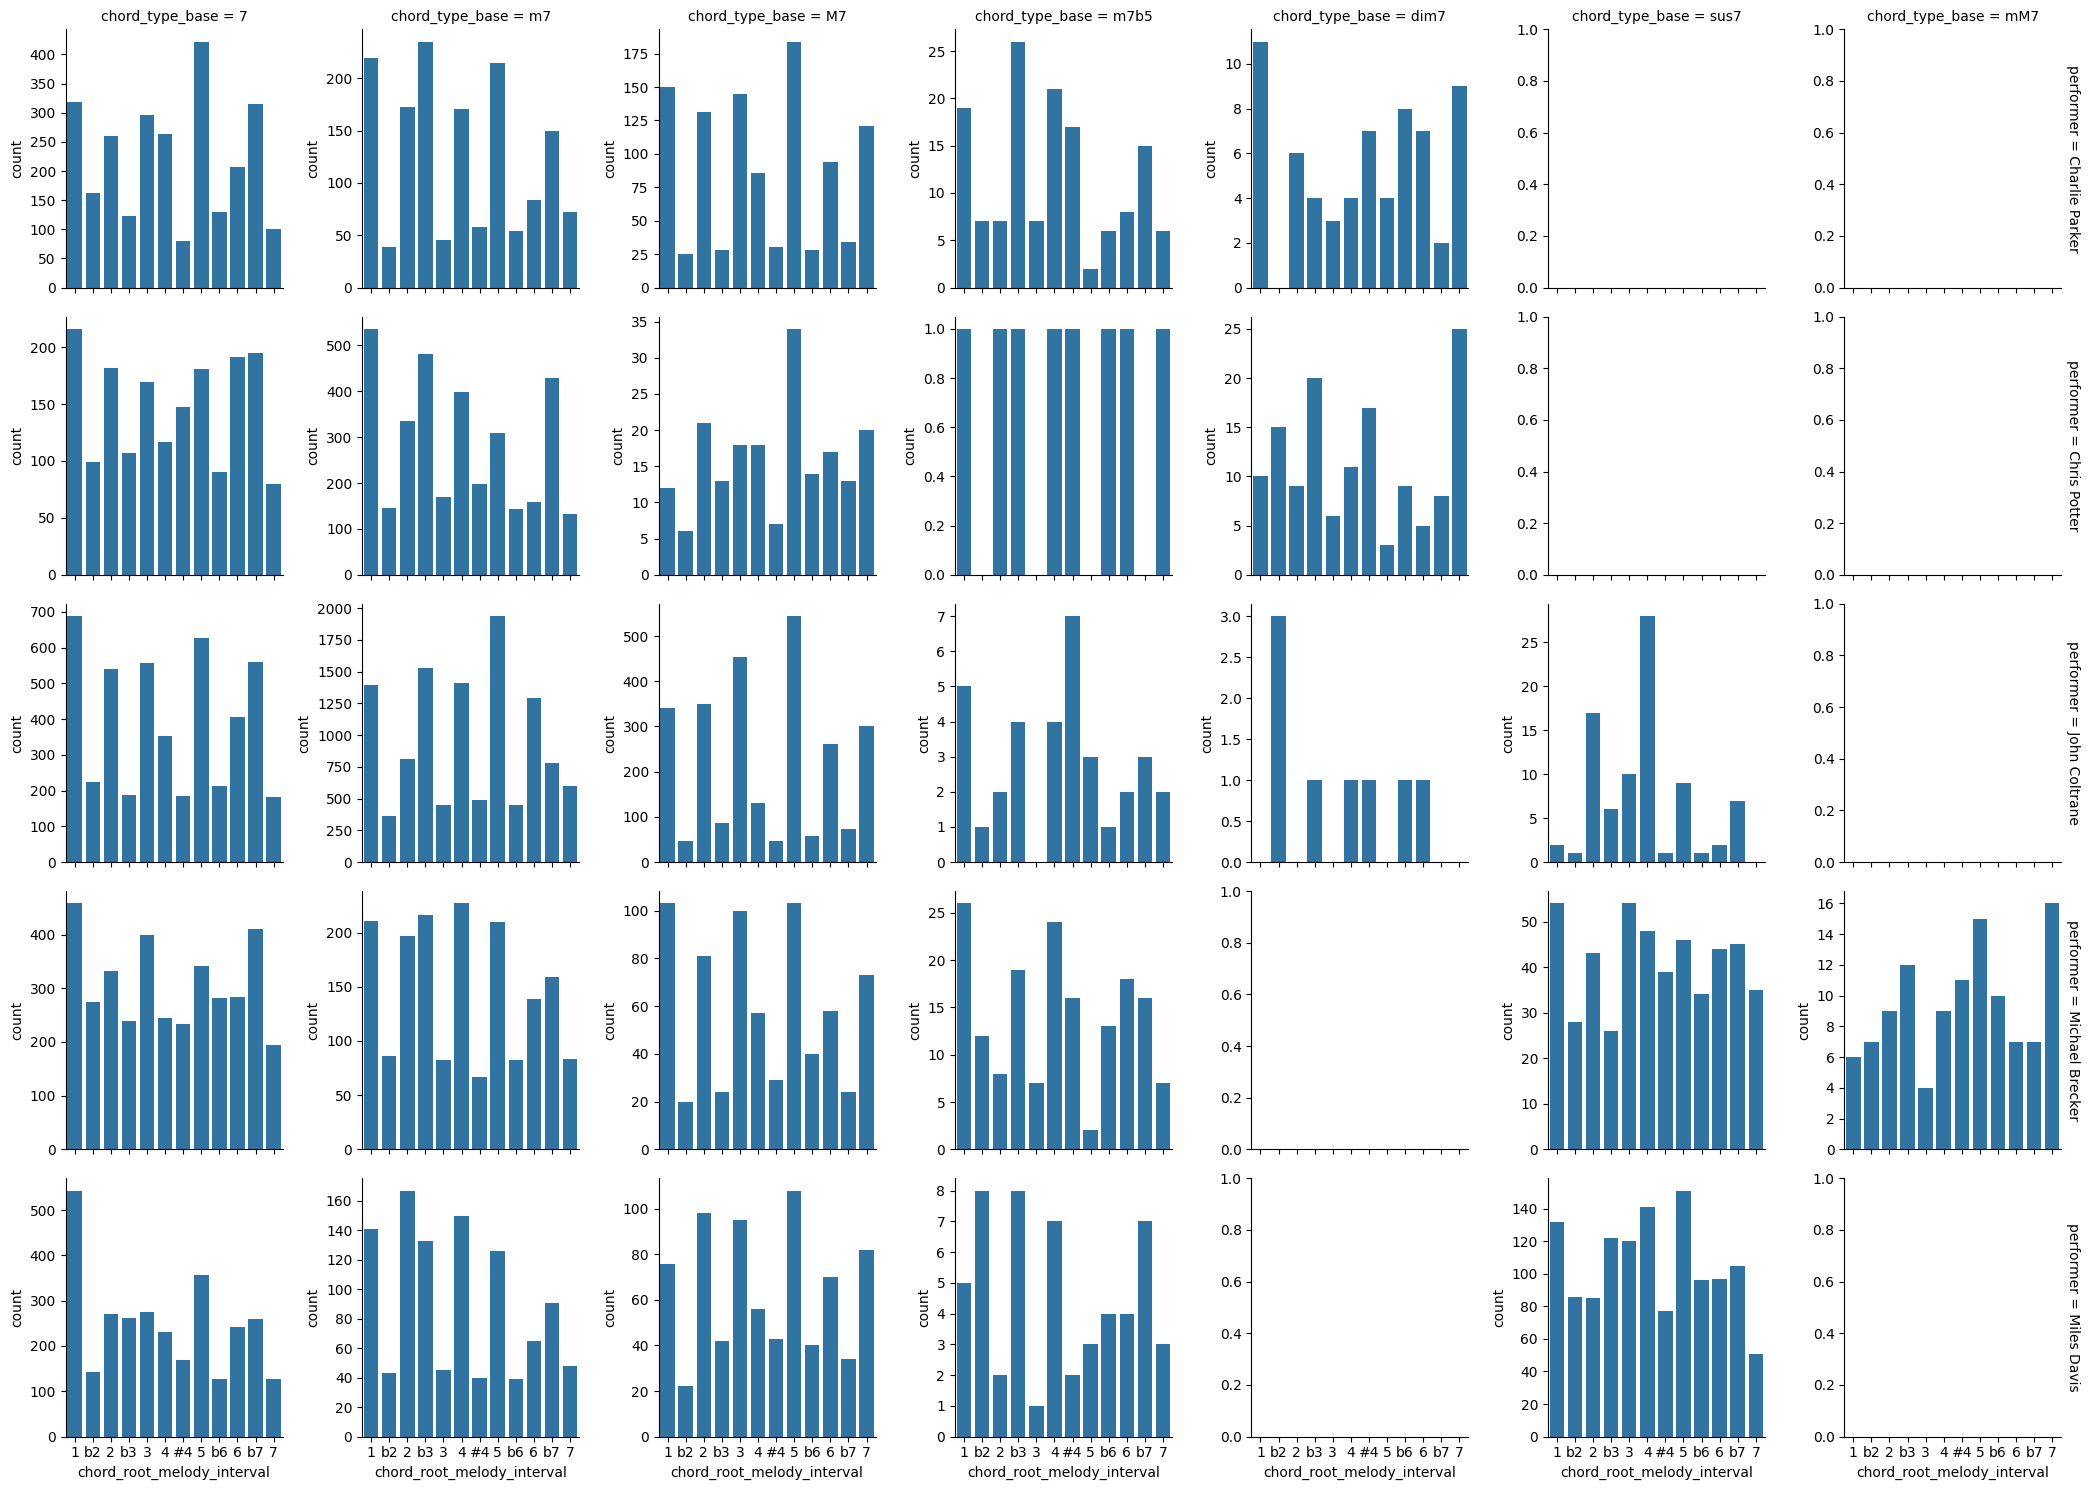

In [18]:
# by artist 

filtered_df = joined.query("chord_type_base != 'NC' and performer in ['John Coltrane', 'Michael Brecker', 'Miles Davis', 'Charlie Parker', 'Chris Potter']")

g = sns.FacetGrid(filtered_df, col="chord_type_base", row="performer", sharey=False, margin_titles=True)
g.map_dataframe(sns.countplot, x="chord_root_melody_interval")
